In [1]:
# Importing the pandas library
# Pandas is a powerful Python data analysis toolkit.
# 'pd' is a conventional alias for pandas.
import pandas as pd

# Reading a CSV file using pandas
# The function read_csv() is used to read a CSV file and convert it into a DataFrame.
# A DataFrame is a two-dimensional data structure with rows and columns, similar to a spreadsheet or a SQL table.
# 'C:\\Users\\pavan\\Desktop\\code with updated results\\code\\block.csv' is the file path where your CSV file is located.
# This path should be accessible from the code's environment.
# The resulting DataFrame is stored in the variable 'data'.
data = pd.read_csv('C:\\Users\\pavan\\Desktop\\code with updated results\\code\\block.csv')


### Dataset

In [2]:

# Dropping rows with any missing values
# The dropna() method removes rows with any NaN (Not a Number) values. 
# This method is commonly used to clean the dataset by removing incomplete entries.
# The resulting DataFrame without NaN entries is stored in 'data_dropped'.
data_dropped = data.dropna()

# Filling the remaining missing values with a specific value
# The fillna(0) method replaces all NaN values in the DataFrame with 0.
# This is useful when you want to retain the size of your dataset and are okay with assigning a default value to missing entries.
# The resulting DataFrame with NaNs filled with 0 is stored in 'data_processed'.
data_processed = data_dropped.fillna(0)

# Displaying the processed data
# The head() method displays the first five rows of the DataFrame.
# This is useful for quickly checking the structure and a few entries of your processed data.
print(data_processed.head())


  member_name                     email  gender   location   employer  \
0       Chipi        ajimmison0@sun.com  female     Kwekwe       Vipe   
1       Femba     rsoonhouse1@google.it  female  Marondera       Mudo   
2        Geta  bchecchetelli2@house.gov  female     Rusape     Skaboo   
3    Tichaona          mgarman3@psu.edu  female     Rusape  Babbleset   
4       Chisa     ccough4@biglobe.ne.jp  female   Bulawayo   Flipopia   

  relationship patient_name  patient_suffix patient_dob  \
0  Grandfather      Mabhena             789  09-11-1997   
1      Husband      Sithole             860   1/14/1992   
2       Mother        Chipi             374  07-03-1999   
3       Father       Jembwa             729   7/31/1978   
4       Father         Foto             716  12/28/1992   

                   cause  Fee_Charged  membership_period  number_of_claims  \
0                  Other         3798               1541                 2   
1                  Other        48905             

### Feature Extraction using PCA

In [3]:
# Importing the pandas library
# Pandas is a widely used library for data manipulation and analysis in Python.
# It provides data structures and functions that make working with structured data easy and intuitive.
import pandas as pd

# Importing PCA (Principal Component Analysis) from sklearn.decomposition
# PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.
# It's a common dimensionality reduction technique used in machine learning and data analysis.
from sklearn.decomposition import PCA

# Importing StandardScaler from sklearn.preprocessing
# StandardScaler standardizes features by removing the mean and scaling to unit variance.
# This is a common preprocessing step in many machine learning pipelines, especially for algorithms that are sensitive to the scale of the input features, such as PCA.
from sklearn.preprocessing import StandardScaler

In [4]:
# Feature Extraction and Dimensionality Reduction

# Extract the numeric columns for feature extraction
# Here, you're specifying the columns from the dataset that you want to include in your analysis.
# These columns are chosen based on their numerical nature and relevance to the analysis.
numeric_columns = ['patient_suffix','Fee_Charged','membership_period','number_of_claims','number_of_dependants','label']

# Selecting the numeric columns for feature extraction
# The dataset 'data' is indexed using the specified columns to create a new DataFrame 'X' which will be used for PCA.
X = data[numeric_columns]

# Apply feature scaling
# StandardScaler is used to standardize the features in X by removing the mean and scaling to unit variance.
# This step is crucial before applying PCA, as PCA is affected by the scale of the features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
# PCA is used to reduce the dimensions of the data while trying to preserve as much variance as possible.
# 'num_components' specifies the number of principal components to keep.
num_components = 5
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the extracted PCA features
# The principal components are stored in a new DataFrame 'pca_df' with columns named 'PCA_1', 'PCA_2', etc.
pca_columns = [f'PCA_{i+1}' for i in range(num_components)]
pca_df = pd.DataFrame(data=X_pca, columns=pca_columns)

# Define meaningful names for the actual columns
# This is the list of original column names that were used for PCA.
actual_column_names = ['patient_suffix','Fee_Charged','membership_period','number_of_claims','number_of_dependants','label']

# Define the mapping of PCA feature columns to actual names based on their index
# This creates a dictionary to map the PCA feature names to more meaningful names based on the original columns.
pca_feature_mapping = {
    pca_columns[i]: actual_column_names[i] + '_PCA' for i in range(num_components)
}

# Renaming the columns of the PCA DataFrame
# The rename() method is used to apply the mapping to the 'pca_df' DataFrame, making the columns more interpretable.
pca_df.rename(columns=pca_feature_mapping, inplace=True)

# Concatenating the original data with the PCA features
# The pd.concat() function is used to concatenate the original dataset 'data' with the 'pca_df' DataFrame.
# This is done along the columns (axis=1), resulting in a final DataFrame that includes both the original features and the PCA features.
final_df_with_actual_names = pd.concat([data, pca_df], axis=1)

# Displaying the head of the final DataFrame
# The head() method is used to print the first five rows of the final DataFrame for a quick overview.
print("Final DataFrame with actual column names for PCA features:")
print(final_df_with_actual_names.head())


Final DataFrame with actual column names for PCA features:
  member_name                     email  gender   location   employer  \
0       Chipi        ajimmison0@sun.com  female     Kwekwe       Vipe   
1       Femba     rsoonhouse1@google.it  female  Marondera       Mudo   
2        Geta  bchecchetelli2@house.gov  female     Rusape     Skaboo   
3    Tichaona          mgarman3@psu.edu  female     Rusape  Babbleset   
4       Chisa     ccough4@biglobe.ne.jp  female   Bulawayo   Flipopia   

  relationship patient_name  patient_suffix patient_dob  \
0  Grandfather      Mabhena             789  09-11-1997   
1      Husband      Sithole             860   1/14/1992   
2       Mother        Chipi             374  07-03-1999   
3       Father       Jembwa             729   7/31/1978   
4       Father         Foto             716  12/28/1992   

                   cause  Fee_Charged  membership_period  number_of_claims  \
0                  Other         3798               1541             

### Feature selection using RFE

In [5]:
# Feature Selection using Recursive Feature Elimination (RFE)

# Importing necessary modules from scikit-learn
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming 'final_df_with_actual_names' contains the DataFrame after PCA and feature concatenation

# Extract only numeric columns for feature selection
# The select_dtypes method is used to filter the DataFrame to only include columns of specific data types, in this case, float64 and int64.
numeric_columns = final_df_with_actual_names.select_dtypes(include=['float64', 'int64']).columns
features = final_df_with_actual_names[numeric_columns]

# Remove the target column from features if it's included
# The target variable (label in this case) should not be part of the features used for selection.
target_column = 'label'
if target_column in features:
    features = features.drop(columns=[target_column])

# Initialize the model for feature selection (Random Forest Classifier)
# RandomForestClassifier is used as the base model for RFE. It's a popular ensemble learning method based on decision trees.
model = RandomForestClassifier()

# Initialize Recursive Feature Elimination (RFE)
# RFE is a feature selection method that fits a model and removes the weakest features until the specified number of features is reached.
num_features_to_select = 3  # Number of features to select
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fit RFE to the data
# The fit method trains the RFE model. This process involves training the RandomForestClassifier iteratively and removing the least important feature at each iteration.
rfe.fit(features, final_df_with_actual_names[target_column])

# Get the selected features
# After fitting, rfe.support_ gives a boolean mask of the selected features.
selected_features = features.columns[rfe.support_]

# Create a DataFrame with only the selected features
selected_features_data = final_df_with_actual_names[selected_features]

# Print selected features along with their values
# This will display the data for the features deemed most important by RFE.
print(selected_features_data)


      patient_suffix_PCA  membership_period_PCA  number_of_dependants_PCA
0              -2.358084               0.743322                  0.248416
1               0.925406              -0.929078                 -1.169983
2               0.873877              -0.996471                 -0.313557
3               0.557792              -1.236760                 -0.477323
4               2.520932               0.560423                  0.681489
...                  ...                    ...                       ...
6998            1.394480               0.306753                  1.363506
6999           -1.076191              -0.097535                 -0.496529
7000            5.230899               0.105121                 -1.292904
7001            3.798391              -0.290187                  1.320367
7002            5.602474              -0.443315                 -1.058473

[7003 rows x 3 columns]


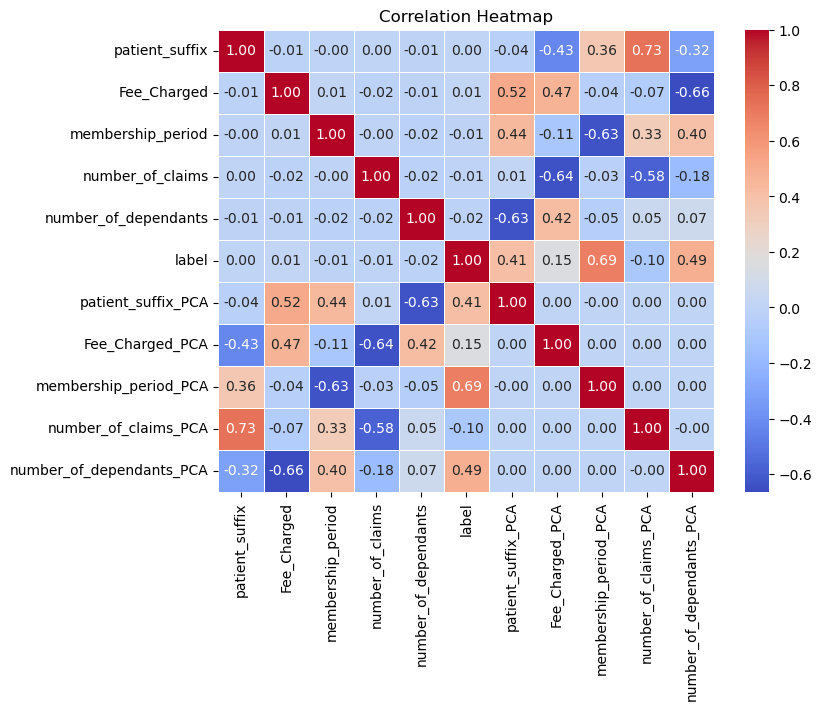

In [6]:
# Visualization of Correlation Matrix using Seaborn and Matplotlib

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'final_df_with_actual_names' is a DataFrame containing the dataset

# Extracting only numeric columns from the DataFrame
# select_dtypes is used to filter the DataFrame to include only specified data types, here 'float64' and 'int64'.
numerical_columns = final_df_with_actual_names.select_dtypes(include=['float64', 'int64']).columns

# Creating a correlation matrix
# The corr() method computes pairwise correlations of columns (excluding NA/null values).
# Correlation values range from -1 to 1, where 1 means a perfect positive correlation and -1 means a perfect negative correlation.
correlation_matrix = final_df_with_actual_names[numerical_columns].corr()

# Setting up the matplotlib figure
# figsize sets the size of the figure created.
plt.figure(figsize=(8, 6))

# Creating a heatmap using seaborn
# sns.heatmap is used to create a heatmap. The correlation matrix is passed as data.
# 'annot=True' annotates the heatmap with correlation values.
# 'cmap' sets the color map. 'coolwarm' is a diverging colormap.
# 'fmt' is the string formatting code to use when adding annotations.
# 'linewidths' sets the width of the lines that will divide each cell.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Displaying the plot
# plt.title sets the title of the heatmap.
# plt.show() displays the figure.
plt.title('Correlation Heatmap')
plt.show()


### AdaBoost

In [7]:
# Suppressing Warnings in Python

# Importing the warnings library
# The warnings library is used to control the display of warning messages in Python.
import warnings

# Filtering warnings
# The filterwarnings function is used to control whether warnings are ignored, displayed, or turned into errors.
# The argument "ignore" causes all warnings to be ignored.
# This is often used in situations where warnings are not critical to the execution of the code, or when they clutter the output.
warnings.filterwarnings("ignore")



In [8]:
# Machine Learning Model Training and Evaluation using AdaBoost

# Importing necessary modules from scikit-learn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Splitting data into features (X) and target (y)
# 'selected_features' are used as the predictors, and 'label' is the target variable.
X = final_df_with_actual_names[selected_features]
y = final_df_with_actual_names['label']

# Splitting the data into training and testing sets
# train_test_split divides the data into training and testing sets.
# test_size=0.2 means 20% of the data is reserved for testing.
# random_state ensures reproducibility of results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
# DecisionTreeClassifier is used as the base classifier for AdaBoost.
tree_classifier = DecisionTreeClassifier()

# Initialize AdaBoost with DecisionTree as base classifier
# AdaBoostClassifier enhances the decision tree by combining multiple weak models to create a stronger model.
# n_estimators=50 defines the number of weak learners to train iteratively.
# learning_rate=0.1 shrinks the contribution of each classifier by 0.1.
adaboost_classifier = AdaBoostClassifier(base_estimator=tree_classifier, n_estimators=50, learning_rate=0.1)

# Train the classifier
# The fit method is used to train the AdaBoost classifier on the training data.
adaboost_classifier.fit(X_train, y_train)

# Predict using the trained AdaBoost classifier
# The predict method is used on the testing data to get the predictions from the model.
predictions = adaboost_classifier.predict(X_test)

# Calculate accuracy
# accuracy_score compares the actual vs predicted values to give the accuracy of the model.
accuracy = accuracy_score(y_test, predictions)

# Calculate confusion matrix
# confusion_matrix is used to evaluate the accuracy of the classification.
conf_matrix = confusion_matrix(y_test, predictions)

# Calculate Sensitivity and Specificity from the confusion matrix (assuming binary classification)
# These metrics are useful for understanding the performance of the classifier in terms of false positives and false negatives.
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

# Calculate Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE)
# RMSE and MAE are metrics used to measure the difference between values predicted by the model and the values observed.
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

# Printing the evaluation metrics
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Accuracy: 0.9971448965024983
Sensitivity: 0.9896193771626297
Specificity: 0.9991007194244604
Root Mean Squared Error (RMSE): 0.05343316851452649
Mean Absolute Error (MAE): 0.0028551034975017845


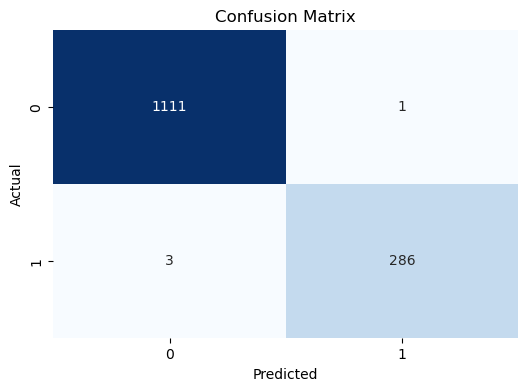

In [9]:
# Visualization of Confusion Matrix using Matplotlib and Seaborn

# Importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
# The confusion_matrix function from sklearn.metrics is used to compute the confusion matrix.
# It compares the actual target values (y_test) with the predicted values from the model (predictions).
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
# plt.figure creates a new figure for plotting.
# figsize sets the size of the figure.
plt.figure(figsize=(6, 4))

# sns.heatmap is used to create a heatmap for the confusion matrix.
# 'conf_matrix' is the confusion matrix data to be plotted.
# 'annot=True' displays the numbers in the heatmap squares.
# 'fmt='d'' formats the annotations to decimal integers.
# 'cmap='Blues'' sets the color scheme of the heatmap to blue shades.
# 'cbar=False' disables the color bar on the side of the heatmap.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Adding labels and title
# plt.title sets the title of the plot.
# plt.xlabel sets the label for the x-axis.
# plt.ylabel sets the label for the y-axis.
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Displaying the plot
# plt.show() renders the plot so it can be viewed.
plt.show()


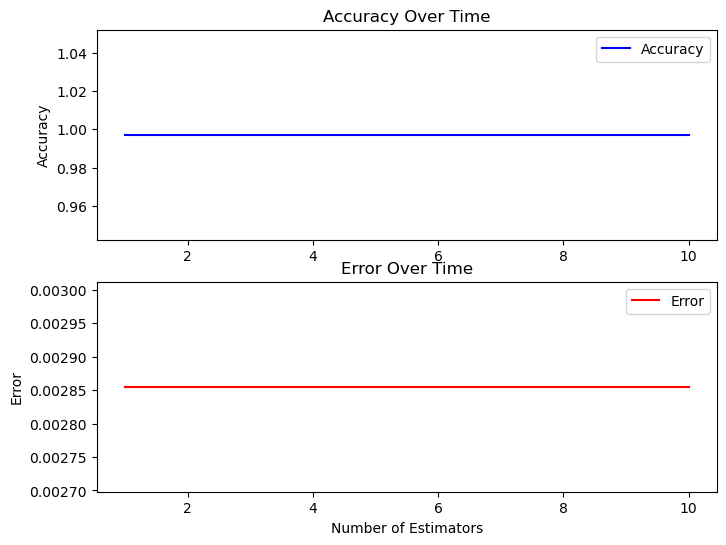

In [10]:
# Performance Evaluation of AdaBoost Classifier Over Iterations
# Lists to store performance metrics over time
accuracy_over_time = []
error_over_time = []

# Train the classifier and evaluate at each iteration
for i in range(1, 11):
    # Setting the number of estimators for AdaBoost
    adaboost_classifier.n_estimators = i

    # Training the AdaBoost classifier
    adaboost_classifier.fit(X_train, y_train)

    # Making predictions
    predictions = adaboost_classifier.predict(X_test)

    # Calculating accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracy_over_time.append(accuracy)

    # Calculating mean squared error
    error = mean_squared_error(y_test, predictions)
    error_over_time.append(error)

# Creating subplots for accuracy and error
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plotting Accuracy Over Time
ax1.plot(range(1, 11), accuracy_over_time, color='blue', label='Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Over Time')
ax1.legend()

# Plotting Error Over Time
ax2.plot(range(1, 11), error_over_time, color='red', label='Error')
ax2.set_xlabel('Number of Estimators')
ax2.set_ylabel('Error')
ax2.set_title('Error Over Time')
ax2.legend()

# Displaying the plots
plt.show()

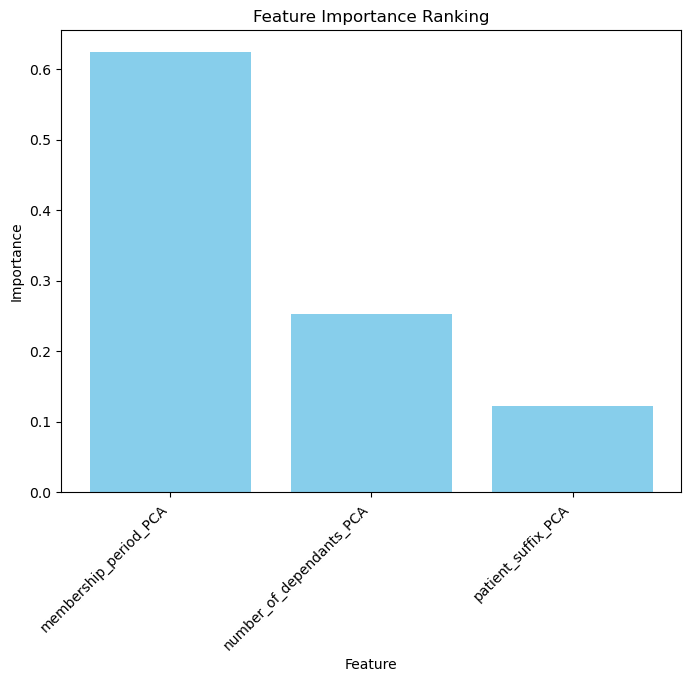

In [11]:
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported

# Assuming 'adaboost_classifier' and 'X' (features data) are already defined and the classifier is trained

# Get feature importances from the trained AdaBoost classifier
# The feature_importances_ attribute of AdaBoost provides the importance of each feature in the training.
feature_importances = adaboost_classifier.feature_importances_

# Create a DataFrame with feature names and their importances
# This DataFrame makes it easier to handle and visualize the data.
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
# Sorting is important to visualize the features in order of their importance.
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Creating a bar chart for Feature Importance Ranking
# plt.figure sets the size of the figure.
plt.figure(figsize=(8, 6))

# plt.bar creates a bar chart.
# The x-axis ('Feature') shows the names of the features, and the y-axis ('Importance') shows their respective importance.
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Ranking')

# Rotating x-axis labels
# This is done for better readability, especially when there are many features or long feature names.
plt.xticks(rotation=45, ha='right')  # 'ha' is the horizontal alignment of the x-axis labels.

# Displaying the plot
plt.show()


In [12]:
# Display the numerical values of feature importances
print(feature_importance_df)


                    Feature  Importance
1     membership_period_PCA    0.624294
2  number_of_dependants_PCA    0.253230
0        patient_suffix_PCA    0.122475


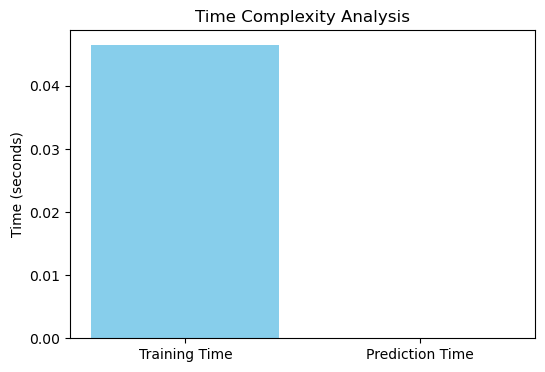

In [13]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Measure training time
start_time = time.time()
adaboost_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
predictions = adaboost_classifier.predict(X_test)
prediction_time = time.time() - start_time

# Plotting Bar Chart
labels = ['Training Time', 'Prediction Time']
times = [training_time, prediction_time]

plt.figure(figsize=(6, 4))
plt.bar(labels, times, color=['skyblue', 'lightgreen'])
plt.ylabel('Time (seconds)')
plt.title('Time Complexity Analysis')
plt.show()


In [14]:
# Display the numerical values of feature importances
print(times)


[0.04648184776306152, 0.0]


### DecisionTree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error

# Assuming 'final_df_with_actual_names' and 'selected_features' are predefined

# Splitting data into features (X) and target (y)
# 'selected_features' are considered as the predictors, and 'label' is the target variable.
X = final_df_with_actual_names[selected_features]
y = final_df_with_actual_names['label']

# Splitting the data into training and testing sets
# train_test_split is used to divide the data. 20% of the data is used as the test set, and 80% as the training set.
# 'random_state' ensures that the splits are reproducible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
# DecisionTreeClassifier is instantiated to create a decision tree model.
tree_classifier = DecisionTreeClassifier()

# Training the classifier on the training data
tree_classifier.fit(X_train, y_train)

# Predicting the target values for the test set
predictions = tree_classifier.predict(X_test)

# Calculating accuracy of the model
# Accuracy is the ratio of correctly predicted observations to the total observations.
accuracy = accuracy_score(y_test, predictions)

# Calculating the confusion matrix
# The confusion matrix is a table used to describe the performance of the classification model.
conf_matrix = confusion_matrix(y_test, predictions)

# Calculating Sensitivity and Specificity from the confusion matrix
# These metrics are especially useful for binary classification tasks.
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)  # Also known as recall
specificity = true_negatives / (true_negatives + false_positives)

# Calculating Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE)
# These are metrics used to measure the difference between values predicted by the model and the values observed.
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

# Printing the evaluation metrics
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Accuracy: 0.9971448965024983
Sensitivity: 0.9930795847750865
Specificity: 0.9982014388489209
Root Mean Squared Error (RMSE): 0.05343316851452649
Mean Absolute Error (MAE): 0.0028551034975017845


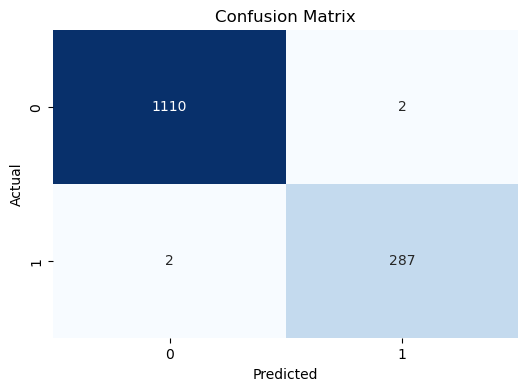

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' and 'predictions' are already defined as per your previous context

# Calculate confusion matrix
# confusion_matrix computes the confusion matrix to evaluate the accuracy of a classification.
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting confusion matrix
# plt.figure creates a new figure for the heatmap.
plt.figure(figsize=(6, 4))

# sns.heatmap creates a heatmap representation of the confusion matrix.
# 'conf_matrix' is the data for the heatmap.
# 'annot=True' displays the numbers in the heatmap squares.
# 'fmt='d'' formats the annotations as integers.
# 'cmap='Blues'' sets the color scheme of the heatmap to blue shades.
# 'cbar=False' disables the color bar on the side of the heatmap.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Adding title and axis labels
# plt.title sets the title of the heatmap.
# plt.xlabel and plt.ylabel set the labels for the x-axis and y-axis, respectively.
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Displaying the plot
# plt.show() renders the plot so it can be viewed.
plt.show()


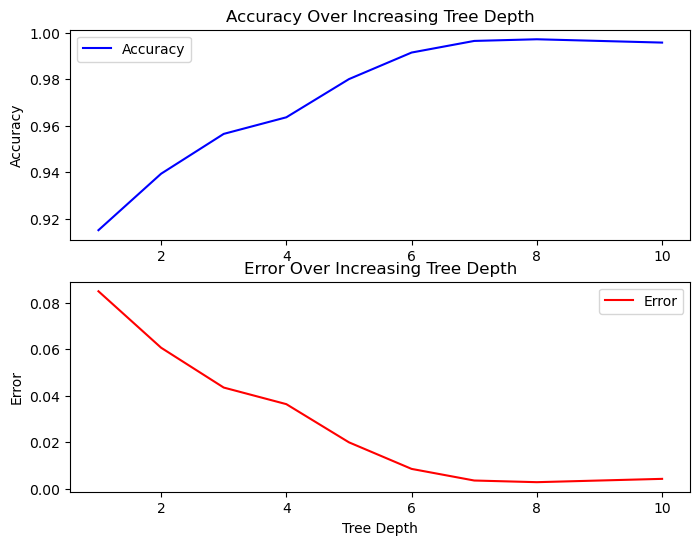

In [17]:
# Lists to store performance metrics over time
accuracy_over_time = []
error_over_time = []

# Train the classifier and evaluate at each iteration with increasing depth
for depth in range(1, 11):
    # Initialize Decision Tree classifier with increasing max_depth
    tree_classifier = DecisionTreeClassifier(max_depth=depth)
    
    # Training the classifier
    tree_classifier.fit(X_train, y_train)

    # Making predictions
    predictions = tree_classifier.predict(X_test)

    # Calculating accuracy and error
    accuracy = accuracy_score(y_test, predictions)
    error = mean_squared_error(y_test, predictions)

    # Append metrics to lists
    accuracy_over_time.append(accuracy)
    error_over_time.append(error)

# Create subplots for accuracy and error
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plotting accuracy over iterations
ax1.plot(range(1, 11), accuracy_over_time, label='Accuracy', color='blue')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Over Increasing Tree Depth')
ax1.legend()

# Plotting error over iterations
ax2.plot(range(1, 11), error_over_time, label='Error', color='red')
ax2.set_xlabel('Tree Depth')
ax2.set_ylabel('Error')
ax2.set_title('Error Over Increasing Tree Depth')
ax2.legend()

plt.show()

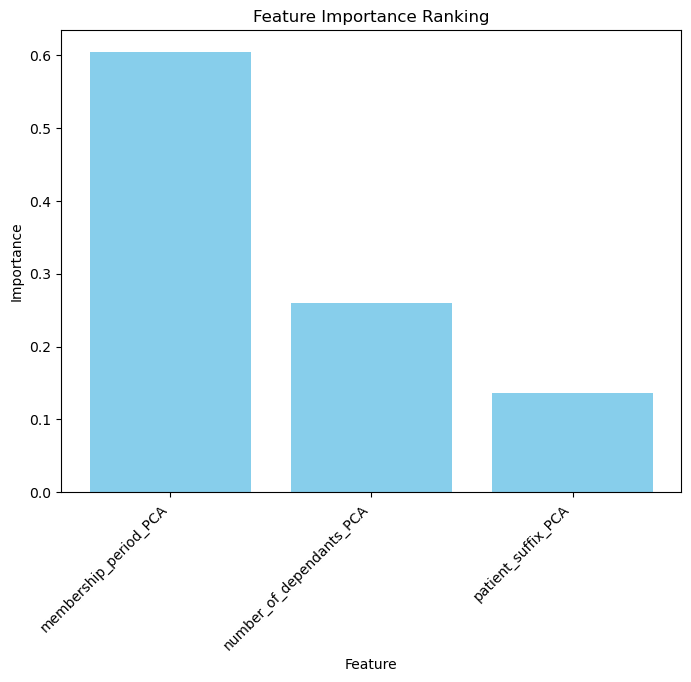

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'tree_classifier' is already trained and 'X' (features data) is defined

# Get feature importances from the trained Decision Tree classifier
# The feature_importances_ attribute provides the importance of each feature in the model.
feature_importances = tree_classifier.feature_importances_

# Create a DataFrame with feature names and their importances
# This DataFrame makes it easier to handle and visualize the data.
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
# Sorting helps to visualize the features in order of their importance.
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Creating a bar chart for Feature Importance Ranking
# plt.figure sets the size of the figure.
plt.figure(figsize=(8, 6))

# plt.bar creates a bar chart.
# The x-axis ('Feature') shows the names of the features, and the y-axis ('Importance') shows their respective importance.
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Ranking')

# Rotating x-axis labels for better readability
# This is particularly useful when there are many features or long feature names.
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.show()


In [19]:
# Display the numerical values of feature importances
print(feature_importance_df)


                    Feature  Importance
1     membership_period_PCA    0.604239
2  number_of_dependants_PCA    0.260173
0        patient_suffix_PCA    0.135588


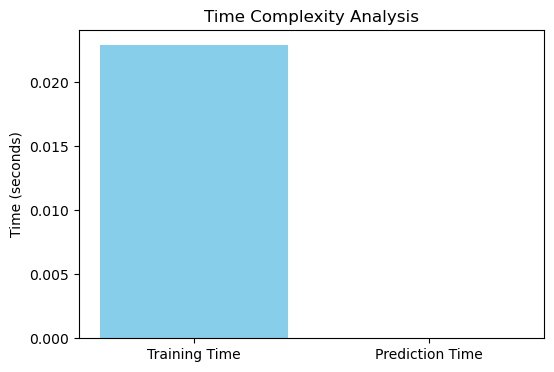

In [20]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Measure training time
start_time = time.time()
tree_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
predictions = tree_classifier.predict(X_test)
prediction_time = time.time() - start_time

# Plotting Bar Chart
labels = ['Training Time', 'Prediction Time']
times = [training_time, prediction_time]

plt.figure(figsize=(6, 4))
plt.bar(labels, times, color=['skyblue', 'lightgreen'])
plt.ylabel('Time (seconds)')
plt.title('Time Complexity Analysis')
plt.show()


In [21]:
print(times)


[0.022928953170776367, 0.0]


### GaussianNB

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error

# Assuming 'final_df_with_actual_names' and 'selected_features' are predefined

# Splitting data into features (X) and target (y)
# 'selected_features' are considered as the predictors, and 'label' is the target variable.
X = final_df_with_actual_names[selected_features]
y = final_df_with_actual_names['label']

# Splitting the data into training and testing sets
# train_test_split is used to divide the data, with 20% reserved for testing.
# 'random_state' ensures that the splits are reproducible and consistent across different runs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
# GaussianNB is typically used for classification tasks.
nb_classifier = GaussianNB()

# Training the classifier
# The fit method is used to train the Naive Bayes classifier on the training data.
nb_classifier.fit(X_train, y_train)

# Predicting the target values for the test set
# The predict method is used on the test data to get the model's predictions.
predictions = nb_classifier.predict(X_test)

# Evaluating the classifier
# accuracy_score computes the accuracy of the model, which is the proportion of correct predictions.
accuracy = accuracy_score(y_test, predictions)

# confusion_matrix is used to evaluate the accuracy of the classification.
# It provides a breakdown of predictions versus actual values.
conf_matrix = confusion_matrix(y_test, predictions)

# Calculating Sensitivity and Specificity
# These metrics are derived from the confusion matrix and are critical for binary classification tasks.
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

# Calculating RMSE and MAE
# These are additional metrics to assess the model's performance.
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

# Printing the performance metrics
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)



Accuracy: 0.9971448965024983
Sensitivity: 0.986159169550173
Specificity: 1.0
Root Mean Squared Error (RMSE): 0.05343316851452649
Mean Absolute Error (MAE): 0.0028551034975017845


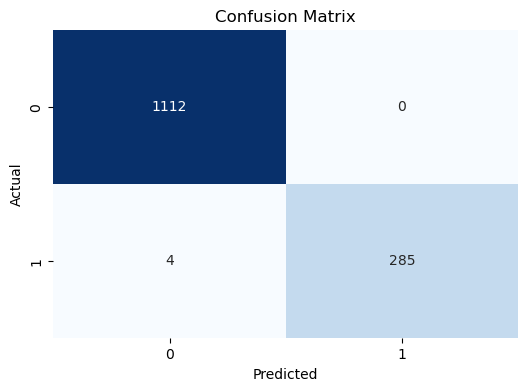

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' and 'predictions' are already defined as per your previous context

# Calculate confusion matrix
# confusion_matrix computes the confusion matrix to evaluate the accuracy of a classification.
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting confusion matrix
# plt.figure creates a new figure for the heatmap.
plt.figure(figsize=(6, 4))

# sns.heatmap creates a heatmap representation of the confusion matrix.
# 'conf_matrix' is the data for the heatmap.
# 'annot=True' displays the numbers in the heatmap squares.
# 'fmt='d'' formats the annotations as integers.
# 'cmap='Blues'' sets the color scheme of the heatmap to blue shades.
# 'cbar=False' disables the color bar on the side of the heatmap.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Adding title and axis labels
# plt.title sets the title of the heatmap.
# plt.xlabel and plt.ylabel set the labels for the x-axis and y-axis, respectively.
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Displaying the plot
# plt.show() renders the plot so it can be viewed.
plt.show()


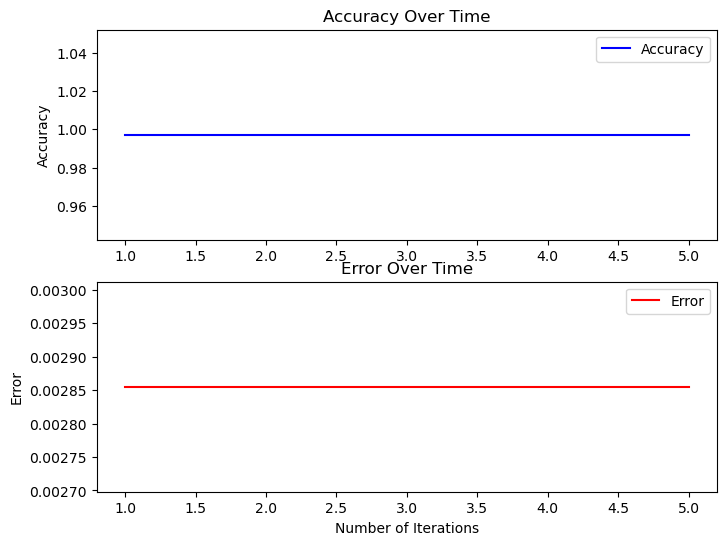

In [24]:

# Lists to store performance metrics over time
accuracy_over_time = []
error_over_time = []

# Train the classifier and evaluate at each iteration
for i in range(1, 6):
    nb_classifier.fit(X_train, y_train)
    predictions = nb_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    error = mean_squared_error(y_test, predictions)

    # Append metrics to lists
    accuracy_over_time.append(accuracy)
    error_over_time.append(error)

# Create subplots for accuracy and error
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot accuracy
ax1.plot(range(1, 6), accuracy_over_time, label='Accuracy', color='blue')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Over Time')
ax1.legend()

# Plot error
ax2.plot(range(1, 6), error_over_time, label='Error', color='red')
ax2.set_xlabel('Number of Iterations')
ax2.set_ylabel('Error')
ax2.set_title('Error Over Time')
ax2.legend()

plt.show()

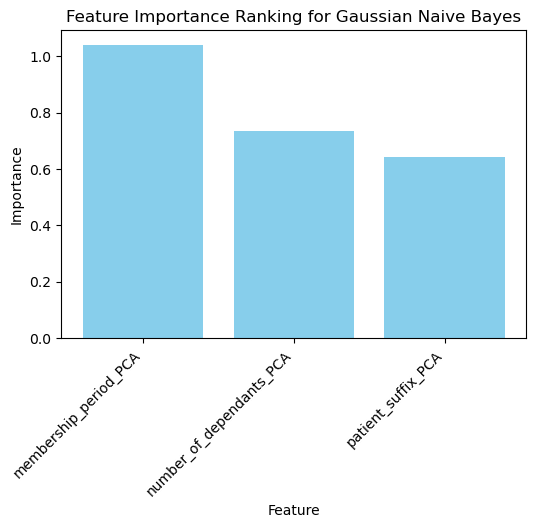

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'nb_classifier' is trained and 'selected_features' is defined

# Get mean values from the trained Gaussian Naive Bayes classifier
# The theta_ attribute holds the mean of each feature per class.
feature_means = nb_classifier.theta_

# Calculate the overall importance of each feature (sum of mean values across all classes)
# Note: This is a simplistic approach and may not accurately represent 'importance' in a traditional sense.
overall_importance = np.sum(feature_means, axis=0)

# Create a DataFrame with feature names and their overall importances
# This DataFrame makes it easier to handle and visualize the data.
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': overall_importance})

# Sort the DataFrame by importance in descending order
# Sorting helps to visualize the features in order of their relative importance.
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Creating a bar chart for Feature Importance Ranking
# plt.figure sets the size of the figure.
plt.figure(figsize=(6, 4))

# plt.bar creates a bar chart.
# The x-axis ('Feature') shows the names of the features, and the y-axis ('Importance') shows their respective importance.
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Ranking for Gaussian Naive Bayes')

# Rotating x-axis labels for better readability
# This is particularly useful when there are many features or long feature names.
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.show()


In [26]:
# Display the numerical values of feature importances
print(feature_importance_df)


                    Feature  Importance
1     membership_period_PCA    1.040937
2  number_of_dependants_PCA    0.735695
0        patient_suffix_PCA    0.644419


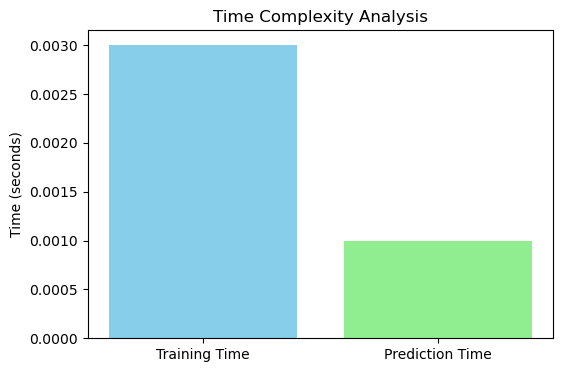

In [27]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Measure training time
start_time = time.time()
nb_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
predictions = nb_classifier.predict(X_test)
prediction_time = time.time() - start_time

# Plotting Bar Chart
labels = ['Training Time', 'Prediction Time']
times = [training_time, prediction_time]

plt.figure(figsize=(6, 4))
plt.bar(labels, times, color=['skyblue', 'lightgreen'])
plt.ylabel('Time (seconds)')
plt.title('Time Complexity Analysis')
plt.show()


In [28]:
# Display the numerical values of feature importances
print(times)


[0.003001689910888672, 0.0009963512420654297]


### GradientBoosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error

# Splitting data into features and target
X = final_df_with_actual_names[selected_features]
y = final_df_with_actual_names['label']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Predict using the trained Gradient Boosting classifier
predictions = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Calculate Sensitivity and Specificity from the confusion matrix (assuming binary classification)
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

# Calculate Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error (MAE): 0.0


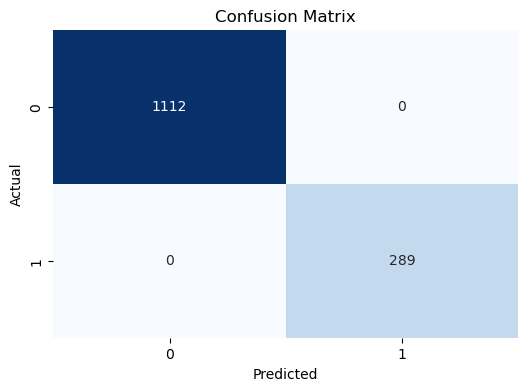

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' and 'predictions' are already defined as per your previous context

# Calculate confusion matrix
# confusion_matrix computes the confusion matrix to evaluate the accuracy of a classification.
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting confusion matrix
# plt.figure creates a new figure for the heatmap.
plt.figure(figsize=(6, 4))

# sns.heatmap creates a heatmap representation of the confusion matrix.
# 'conf_matrix' is the data for the heatmap.
# 'annot=True' displays the numbers in the heatmap squares.
# 'fmt='d'' formats the annotations as integers.
# 'cmap='Blues'' sets the color scheme of the heatmap to blue shades.
# 'cbar=False' disables the color bar on the side of the heatmap.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Adding title and axis labels
# plt.title sets the title of the heatmap.
# plt.xlabel and plt.ylabel set the labels for the x-axis and y-axis, respectively.
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Displaying the plot
# plt.show() renders the plot so it can be viewed.
plt.show()


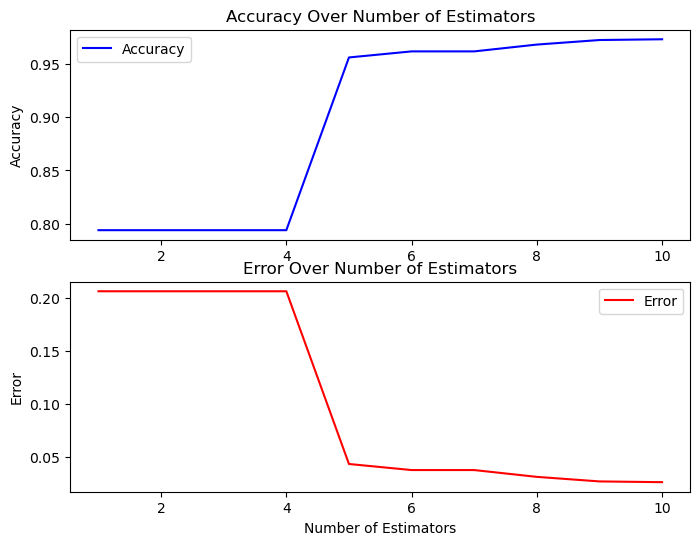

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'X_train', 'y_train', 'X_test', and 'y_test' are already defined

# Lists to store performance metrics over time
accuracy_over_time = []
error_over_time = []

# Train the classifier and evaluate at each iteration
for i in range(1, 11):
    # Create a new instance of GradientBoostingClassifier with the current number of estimators
    gb_classifier = GradientBoostingClassifier(n_estimators=i, learning_rate=0.1, random_state=42)

    # Train the classifier
    gb_classifier.fit(X_train, y_train)

    # Predict and evaluate
    predictions = gb_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    error = mean_squared_error(y_test, predictions)

    # Append metrics to lists
    accuracy_over_time.append(accuracy)
    error_over_time.append(error)

# Create subplots for accuracy and error
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot accuracy
ax1.plot(range(1, 11), accuracy_over_time, label='Accuracy', color='blue')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Over Number of Estimators')
ax1.legend()

# Plot error
ax2.plot(range(1, 11), error_over_time, label='Error', color='red')
ax2.set_xlabel('Number of Estimators')
ax2.set_ylabel('Error')
ax2.set_title('Error Over Number of Estimators')
ax2.legend()

plt.show()


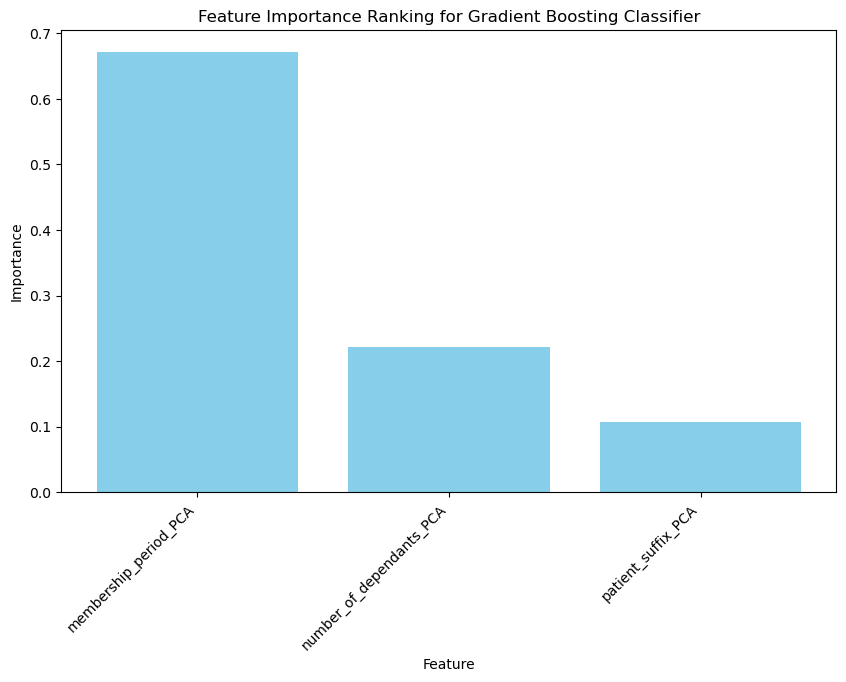

In [32]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Gradient Boosting classifier
feature_importances = gb_classifier.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Bar chart for Feature Importance Ranking
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Ranking for Gradient Boosting Classifier')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [33]:
# Display the numerical values of feature importances
print(feature_importance_df)


                    Feature  Importance
1     membership_period_PCA    0.671347
2  number_of_dependants_PCA    0.222150
0        patient_suffix_PCA    0.106503


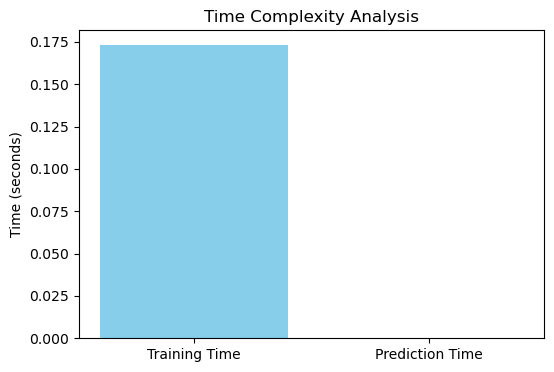

In [35]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Measure training time
start_time = time.time()
gb_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
predictions = gb_classifier.predict(X_test)
prediction_time = time.time() - start_time

# Plotting Bar Chart
labels = ['Training Time', 'Prediction Time']
times = [training_time, prediction_time]

plt.figure(figsize=(6, 4))
plt.bar(labels, times, color=['skyblue', 'lightgreen'])
plt.ylabel('Time (seconds)')
plt.title('Time Complexity Analysis')
plt.show()


In [36]:
print(times)


[0.173140287399292, 0.0]


### Ensemble Model

In [37]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error

# Assuming 'final_df_with_actual_names' and 'selected_features' are predefined

# Splitting data into features (X) and target (y)
X = final_df_with_actual_names[selected_features]
y = final_df_with_actual_names['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
# AdaBoost with Decision Tree as base estimator
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
# Gaussian Naive Bayes Classifier
gnb_classifier = GaussianNB()
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Create a voting ensemble using the individual classifiers
# VotingClassifier aggregates the predictions from each classifier to predict the class label.
voting_classifier = VotingClassifier(
    estimators=[
        ('AdaBoost', ada_classifier),
        ('DecisionTree', dt_classifier),
        ('GaussianNB', gnb_classifier),
        ('GradientBoosting', gb_classifier)
    ],
    voting='hard'  # 'hard' voting is used here. For 'soft' voting, set voting='soft'
)

# Train the voting ensemble
voting_classifier.fit(X_train, y_train)

# Predict using the trained voting ensemble
predictions = voting_classifier.predict(X_test)

# Calculate metrics
# Accuracy: Proportion of correct predictions
accuracy = accuracy_score(y_test, predictions)
# Confusion matrix: Evaluation of the classification accuracy
conf_matrix = confusion_matrix(y_test, predictions)
# Extracting TN, FP, FN, TP from the confusion matrix
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
# Sensitivity: True Positive Rate
sensitivity = true_positives / (true_positives + false_negatives)
# Specificity: True Negative Rate
specificity = true_negatives / (true_negatives + false_positives)
# RMSE: Root Mean Squared Error
rmse = mean_squared_error(y_test, predictions, squared=False)
# MAE: Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

# Printing the performance metrics
print("Metrics for Voting Classifier:")
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Metrics for Voting Classifier:
Accuracy: 0.9971448965024983
Sensitivity: 0.986159169550173
Specificity: 1.0
Root Mean Squared Error (RMSE): 0.05343316851452649
Mean Absolute Error (MAE): 0.0028551034975017845


### Confusion Matrix

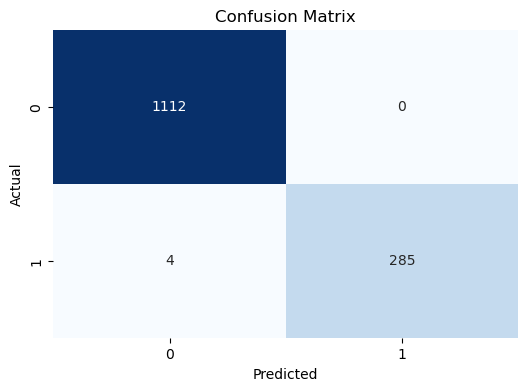

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model Weightage

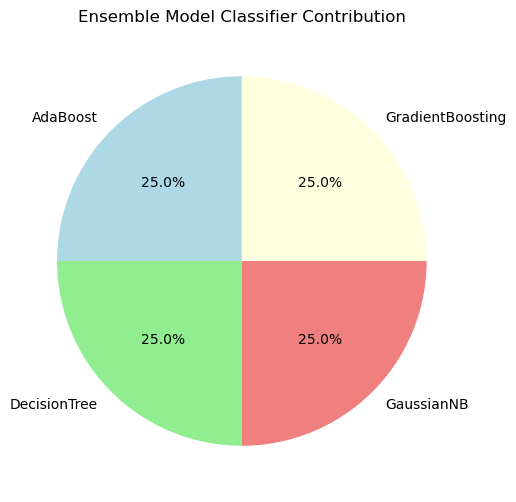

In [39]:
import matplotlib.pyplot as plt

# Extract names of classifiers
classifier_names = [estimator[0] for estimator in voting_classifier.estimators]

# In a hard voting ensemble, each classifier contributes one vote, so they have equal weight
classifier_weights = [1 for _ in classifier_names]

# Plotting Pie Chart
# plt.figure creates a new figure for the pie chart.
plt.figure(figsize=(6, 6))

# plt.pie creates a pie chart.
# 'classifier_weights' are the weights (equal in this case) for each classifier.
# 'labels=classifier_names' sets the labels for each section of the pie.
# 'autopct' formats the percentage displayed on the pie chart.
# 'startangle' sets the start angle for the first pie section.
# 'colors' list sets the colors for each section.
plt.pie(classifier_weights, labels=classifier_names, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Ensemble Model Classifier Contribution')

# Displaying the plot
plt.show()


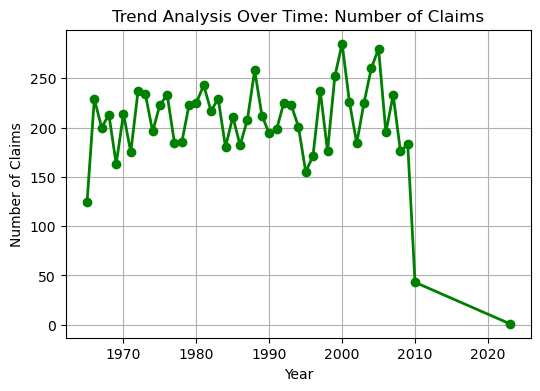

In [40]:

# Convert 'patient_dob' to datetime format
# The 'errors='coerce'' parameter ensures that any invalid parsing will result in a NaT (not a time) value.
data['patient_dob'] = pd.to_datetime(data['patient_dob'], errors='coerce')

# Extract the year from 'patient_dob' and create a new column 'claim_year'
data['claim_year'] = data['patient_dob'].dt.year

# Grouping data by 'claim_year' and summing 'number_of_claims' for each year
# reset_index() is used to convert the grouped data back into DataFrame format.
claim_trends = data.groupby('claim_year')['number_of_claims'].sum().reset_index()

# Creating a line graph for trend analysis
# plt.figure creates a new figure for the plot.
plt.figure(figsize=(6, 4))

# plt.plot creates a line graph.
# 'claim_year' is on the x-axis and 'number_of_claims' is on the y-axis.
# 'marker='o'' adds circular markers at each data point.
# 'color' sets the color of the line, 'linestyle' sets the style of the line, and 'linewidth' sets the width of the line.
plt.plot(claim_trends['claim_year'], claim_trends['number_of_claims'], marker='o', color='green', linestyle='-', linewidth=2)

# Adding title and axis labels
plt.title('Trend Analysis Over Time: Number of Claims')
plt.xlabel('Year')
plt.ylabel('Number of Claims')

# Adding a grid for better readability
plt.grid(True)

# Displaying the plot
plt.show()

### Model comparsion

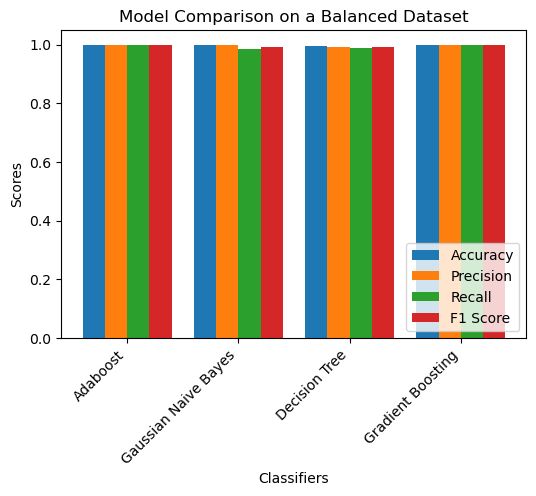

In [41]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'X_train', 'y_train', 'X_test', and 'y_test' are already defined

# Initialize classifiers
classifiers = {
    'Adaboost': AdaBoostClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Initialize dictionaries to store results
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Train and evaluate each model
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculating and storing various metrics
    accuracy_scores[clf_name] = accuracy_score(y_test, y_pred)
    precision_scores[clf_name] = precision_score(y_test, y_pred)
    recall_scores[clf_name] = recall_score(y_test, y_pred)
    f1_scores[clf_name] = f1_score(y_test, y_pred)

# Creating a bar chart for model comparison
fig, ax = plt.subplots(figsize=(6, 4))

# Bar width
bar_width = 0.2
index = range(len(classifiers))

# Plot metrics for each classifier
ax.bar(index, accuracy_scores.values(), width=bar_width, label='Accuracy')
ax.bar([i + bar_width for i in index], precision_scores.values(), width=bar_width, label='Precision')
ax.bar([i + 2 * bar_width for i in index], recall_scores.values(), width=bar_width, label='Recall')
ax.bar([i + 3 * bar_width for i in index], f1_scores.values(), width=bar_width, label='F1 Score')

# Setting labels, title, and tick marks
ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison on a Balanced Dataset')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(classifiers.keys(), rotation=45, ha='right')

# Adding a legend
ax.legend(loc='lower right')

# Displaying the plot
plt.show()
